<a href="https://colab.research.google.com/github/ANIL-BUSSA/LLINTERN/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Kaggle API
!pip install kaggle

# Create a Kaggle directory and move the kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset from Kaggle
!kaggle datasets download -d mlg-ulb/creditcardfraud

# Unzip the downloaded dataset
!unzip creditcardfraud.zip



mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [5]:
# Load the new dataset
data = pd.read_csv('creditcard.csv')

# Explore the dataset
print(data.head())
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [6]:
# Scale the 'Amount' feature
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Drop the 'Time' column
data.drop(columns=['Time'], inplace=True)

# Define the features and the target variable
X = data.drop(columns=['Class'])
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [7]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, lr_model.predict_proba(X_test)[:,1]))


Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9558809490312727


In [8]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree:")
print(classification_report(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1]))


Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.77      0.75        98

    accuracy                           1.00     56962
   macro avg       0.87      0.88      0.87     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.8824156526707475


In [10]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))


Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

ROC AUC Score: 0.9525854024783802


In [11]:
# Neural Network
nn_model = Sequential()
nn_model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predictions
y_pred_nn = nn_model.predict(X_test).flatten()
y_pred_nn = np.where(y_pred_nn > 0.5, 1, 0)

# Evaluation
print("Neural Network:")
print(classification_report(y_test, y_pred_nn))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_nn))


Epoch 1/10
5697/5697 [==============================] - 15s 3ms/step - loss: 0.0119 - accuracy: 0.9972 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 2/10
5697/5697 [==============================] - 14s 2ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 3/10
5697/5697 [==============================] - 14s 2ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0027 - val_accuracy: 0.9995
Epoch 4/10
5697/5697 [==============================] - 16s 3ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0029 - val_accuracy: 0.9994
Epoch 5/10
5697/5697 [==============================] - 15s 3ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 6/10
5697/5697 [==============================] - 15s 3ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0030 - val_accuracy: 0.9995
Epoch 7/10
5697/5697 [==============================] - 14s 2ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 0.0030 - val_ac

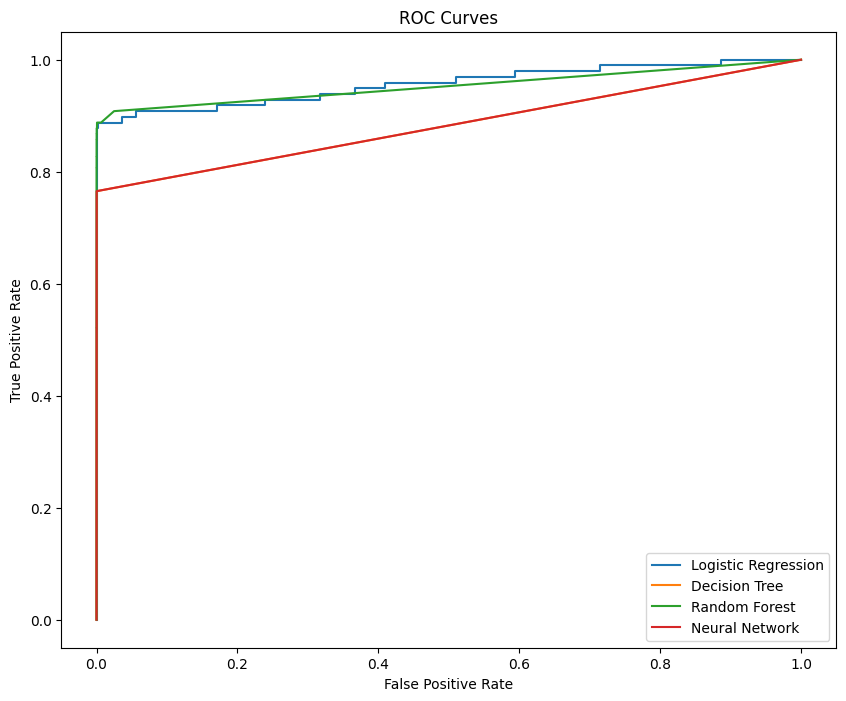

In [12]:
# Plot ROC curves
plt.figure(figsize=(10, 8))

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:,1])
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
plt.plot(fpr_rf, tpr_rf, label='Random Forest')

# Neural Network
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_nn)
plt.plot(fpr_nn, tpr_nn, label='Neural Network')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()
